In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()#for plot styling

In [4]:
# To make some sample data we have to use make_blobs
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples = 300,centers = 4,cluster_std = 0.60,random_state=0)

In [14]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

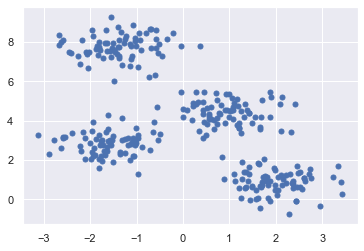

In [10]:
plt.scatter(X[:,0],X[:,1],s=25)
plt.grid(True)

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_means = kmeans.predict(X)
y_means
# it basically shows or predicts in which cluster the given value is gonna store.

array([3, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2,
       0, 0, 1, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 0, 0,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2,
       1, 1, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2,
       0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2, 0, 1,
       3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 3, 3, 2,
       1, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 3,
       1, 0, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0])

In [16]:

# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314]])

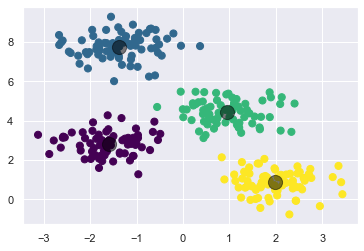

In [40]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters,rseed = 2):
#     randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
#         ASSIGN LABELS BASED ON CLOSEST CENTER
        labels = pairwise_distances_argmin(X,centers)
#     find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
    
#     check for convergence
        if np.all(centers == new_centers):
            break;
        centers = new_centers
        
    return centers,labels

centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_means,s=50,cmap='viridis')

plt.scatter(centers[:,0],centers[:,1], c = "black",s = 200,alpha=0.5)
    

Above are the centroids of the clusters.